In [6]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

#Learn more about the equations from wikipedia: https://en.wikipedia.org/wiki/Lotka–Volterra_equations

In [7]:
def lotka_volterra(t, y, alpha, beta, delta, gamma):
    """
    Lotka-Volterra predator-prey model
    y[0] = prey population (x)
    y[1] = predator population (y)
    """
    x, y = y
    dxdt = alpha * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return [dxdt, dydt]

In [ ]:
# Parameters
alpha = 1.0  # prey growth rate
beta = 0.5   # predation rate
delta = 0.2  # predator efficiency
gamma = 0.8  # predator death rate

# Initial conditions [prey, predator]
#y0 = [4.0, 2.0] #these are stable initial conditions
y0 = [6.0, 3.0] #these are unstable initial conditions

# Time span
t_span = (0, 20)
t_eval = np.linspace(0, 20, 1000)

# Solve the system
solution = solve_ivp(lotka_volterra, t_span, y0, t_eval=t_eval, 
                    args=(alpha, beta, delta, gamma), method='RK45')

# Extract results
t = solution.t
prey = solution.y[0]
predator = solution.y[1]

#Print prey and predator populations over time
for time, x, y in zip(t, prey, predator):
    print(f"Time: {time:.2f}, Prey: {x:.2f}, Predator: {y:.2f}")

Time: 0.00, Prey: 6.00, Predator: 3.00
Time: 0.02, Prey: 5.94, Predator: 3.02
Time: 0.04, Prey: 5.88, Predator: 3.05
Time: 0.06, Prey: 5.82, Predator: 3.07
Time: 0.08, Prey: 5.75, Predator: 3.09
Time: 0.10, Prey: 5.69, Predator: 3.11
Time: 0.12, Prey: 5.63, Predator: 3.13
Time: 0.14, Prey: 5.56, Predator: 3.15
Time: 0.16, Prey: 5.50, Predator: 3.17
Time: 0.18, Prey: 5.44, Predator: 3.19
Time: 0.20, Prey: 5.37, Predator: 3.21
Time: 0.22, Prey: 5.31, Predator: 3.22
Time: 0.24, Prey: 5.25, Predator: 3.24
Time: 0.26, Prey: 5.18, Predator: 3.26
Time: 0.28, Prey: 5.12, Predator: 3.27
Time: 0.30, Prey: 5.06, Predator: 3.28
Time: 0.32, Prey: 4.99, Predator: 3.30
Time: 0.34, Prey: 4.93, Predator: 3.31
Time: 0.36, Prey: 4.87, Predator: 3.32
Time: 0.38, Prey: 4.81, Predator: 3.33
Time: 0.40, Prey: 4.74, Predator: 3.34
Time: 0.42, Prey: 4.68, Predator: 3.35
Time: 0.44, Prey: 4.62, Predator: 3.36
Time: 0.46, Prey: 4.56, Predator: 3.36
Time: 0.48, Prey: 4.50, Predator: 3.37
Time: 0.50, Prey: 4.44, P

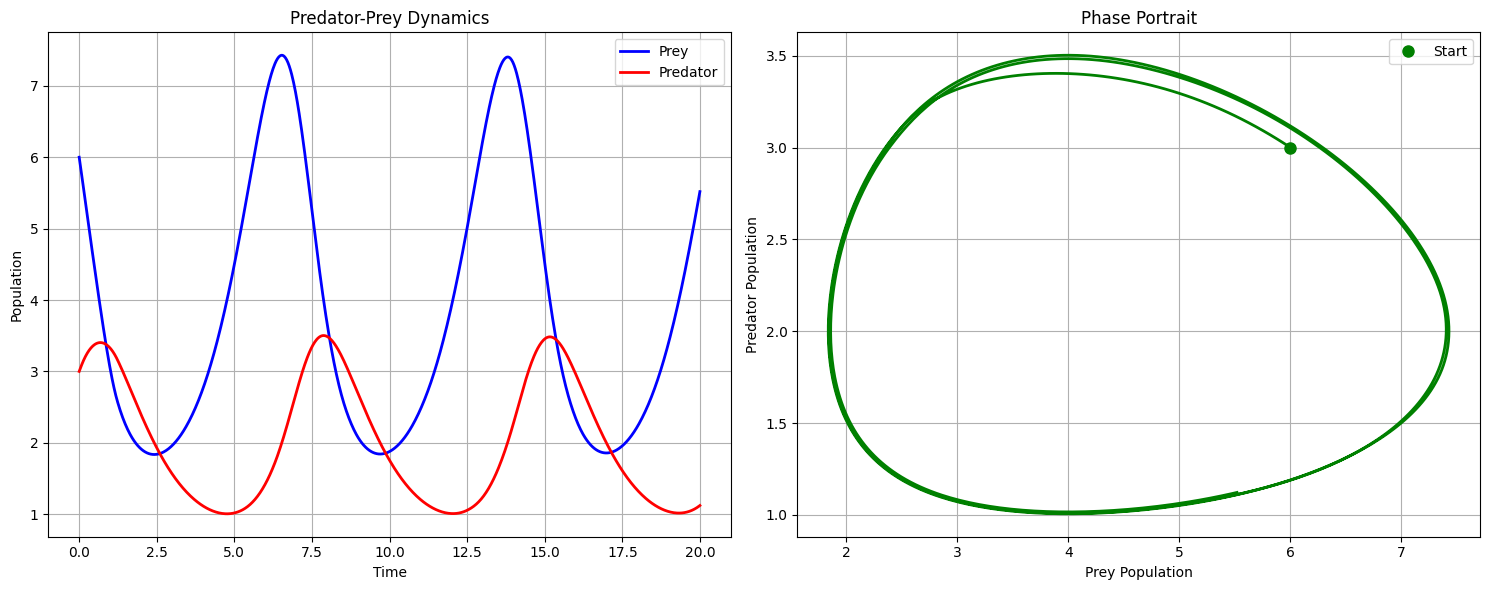

Prey oscillates between 1.84 and 7.43
Predator oscillates between 1.01 and 3.50


In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Time series
ax1.plot(t, prey, 'b-', label='Prey', linewidth=2)
ax1.plot(t, predator, 'r-', label='Predator', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.set_title('Predator-Prey Dynamics')
ax1.legend()
ax1.grid(True)

# Phase portrait
ax2.plot(prey, predator, 'g-', linewidth=2)
ax2.plot(prey[0], predator[0], 'go', markersize=8, label='Start')
ax2.set_xlabel('Prey Population')
ax2.set_ylabel('Predator Population')
ax2.set_title('Phase Portrait')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Prey oscillates between {prey.min():.2f} and {prey.max():.2f}")
print(f"Predator oscillates between {predator.min():.2f} and {predator.max():.2f}")